<a href="https://colab.research.google.com/gist/saicodes/56b357639abfa43001e3c4e7cd42f69c/photo_capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import HTML, Image, Javascript
from google.colab.output import eval_js
from base64 import b64decode



def take_photo(filename='photo.jpg', quality=0.8):
  display(VIDEO_JS)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
VIDEO_JS = Javascript('''
async function takePhoto(quality) {
  const div = document.createElement('div');
  const capture = document.createElement('button');
  capture.textContent = 'Capture';
  div.appendChild(capture);

  const video = document.createElement('video');
  video.style.display = 'block';
  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  
  document.body.appendChild(div);
  div.appendChild(video);
  video.srcObject = stream;
  await video.play();

  // Resize the output to fit the video element.
  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

  // Wait for Capture to be clicked.
  await new Promise((resolve) => capture.onclick = resolve);

  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);
  stream.getVideoTracks()[0].stop();
  div.remove();
  return canvas.toDataURL('image/jpeg', quality);
}
''')

In [16]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


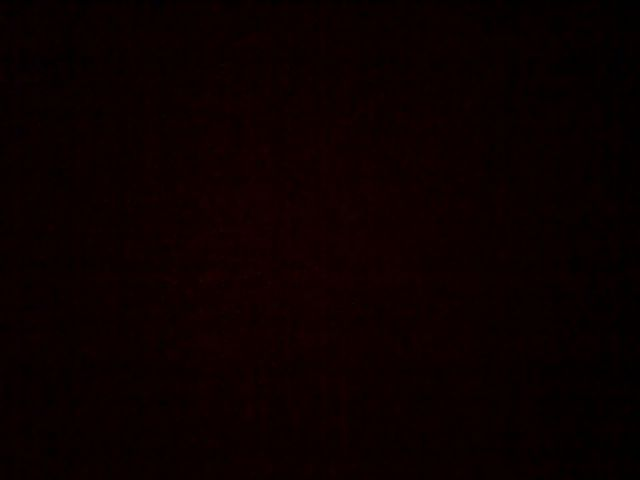

In [17]:
from IPython.display import Image
Image(filename='photo.jpg') 